In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('kaggle_data/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df['Legendary'] = df['Legendary'].astype(int)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


<AxesSubplot:xlabel='HP', ylabel='Attack'>

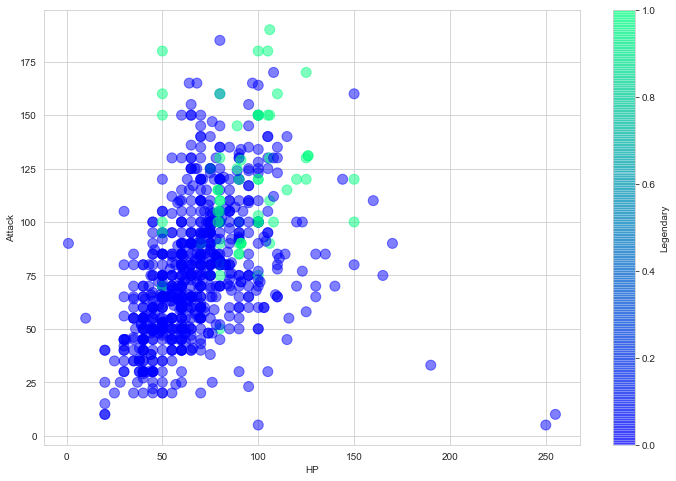

In [8]:
flg, ax = plt.subplots(figsize=(12, 8))
df.plot(kind='scatter', x='HP', y='Attack', s=100, c='Legendary', cmap='winter', alpha=0.5, ax=ax)

In [9]:
df.loc[:, 'HP':'Speed'].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


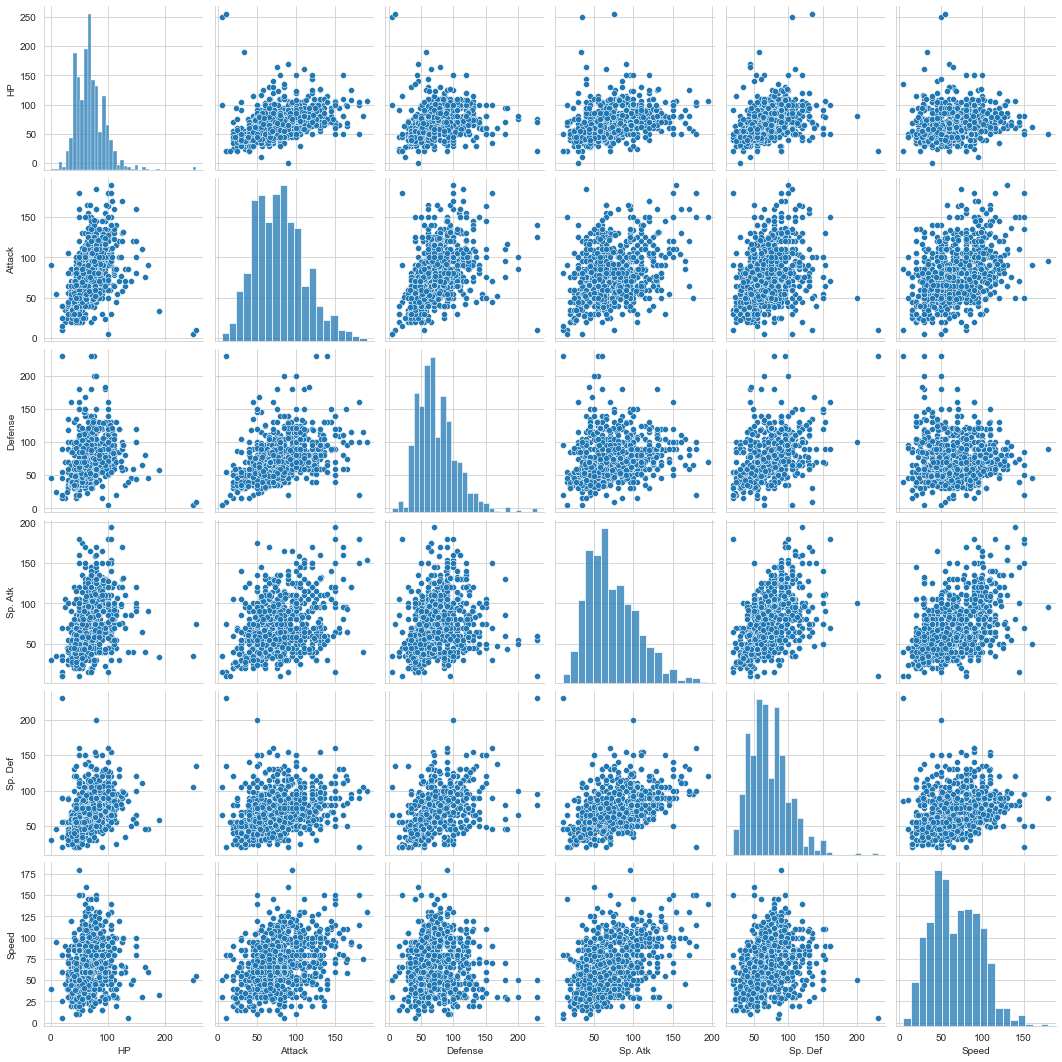

In [11]:
sns.pairplot(df.loc[:, 'HP':'Speed'])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()
X_pca = pca.fit_transform(df.loc[:, 'HP':'Speed'])
df_pca = pd.DataFrame(X_pca, columns=['1st', '2nd', '3rd', '4th', '5th', '6th'])
df_pca.head()

,1st,2nd,3rd,4th,5th,6th
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302


In [14]:
pca.explained_variance_ratio_

array([0.46096131, 0.18752145, 0.13584163, 0.09803479, 0.07378238,
       0.04385843])

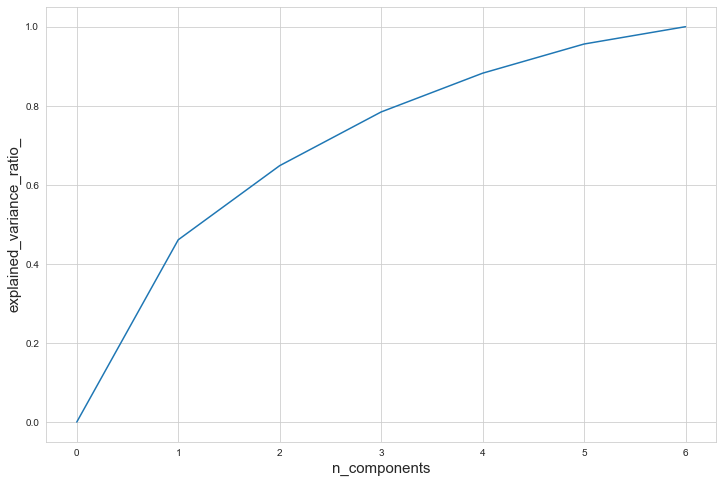

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel('n_components', fontsize=15)
plt.ylabel('explained_variance_ratio_', fontsize=15)
plt.show()

In [20]:
pca.components_

array([[ 0.30080785,  0.49289178,  0.38063453,  0.50898063,  0.39436984,
         0.32726262],
       [ 0.04221029,  0.0765448 ,  0.69521578, -0.38331141,  0.17389431,
        -0.57607928],
       [-0.05898335, -0.73043106,  0.04150427,  0.38478597,  0.54078717,
        -0.14407571],
       [ 0.80159275,  0.02736268, -0.36601146,  0.10099765, -0.04170419,
        -0.45912547],
       [ 0.38716678, -0.1932467 , -0.02643827, -0.64085394,  0.37522525,
         0.51046142],
       [-0.33437231,  0.42376414, -0.48518697, -0.15829258,  0.61583212,
        -0.26250137]])

<AxesSubplot:>

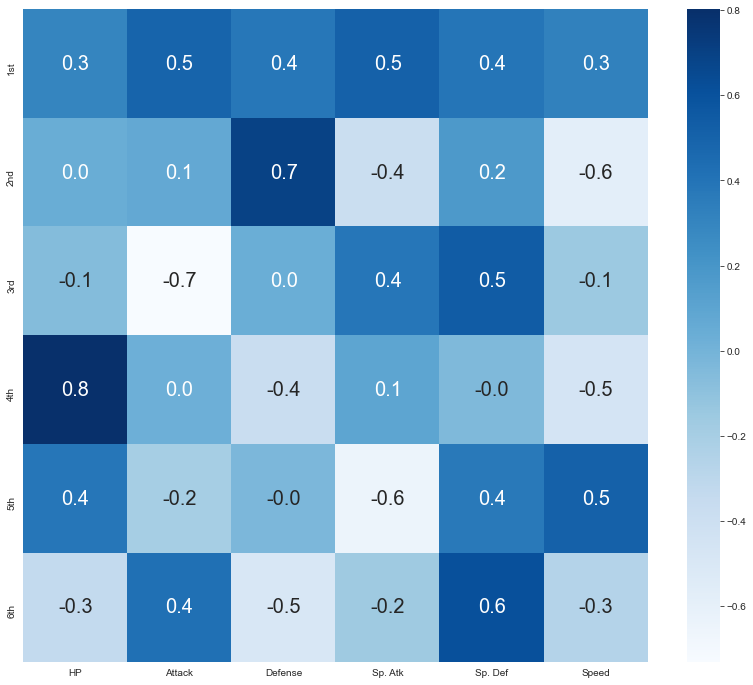

In [21]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    pca.components_, 
    cmap='Blues', 
    annot=True, 
    annot_kws={"size": 20},
    fmt="1.1f",
    xticklabels=df.loc[:, 'HP':'Speed'].columns,
    yticklabels=['1st', '2nd', '3rd', '4th', '5th', '6th']
)

<AxesSubplot:xlabel='1st', ylabel='2nd'>

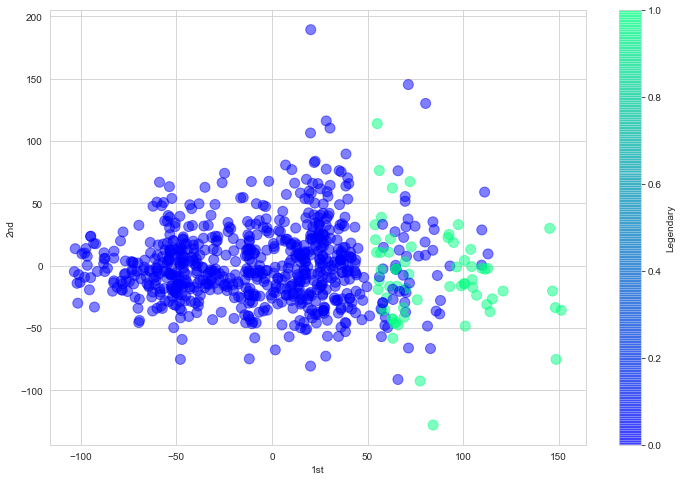

In [22]:
df_pca['Legendary'] = df['Legendary']
flg, ax = plt.subplots(figsize=(12, 8))
df_pca.plot(kind='scatter', x='1st', y='2nd', s=100, c='Legendary', cmap='winter', alpha=0.5, ax=ax)

In [23]:
df = pd.read_csv('kaggle_data/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df.shape

(1460, 81)

In [26]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [27]:
print('before', df.shape)
df = df.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
print('after', df.shape)

before (1460, 81)
after (1460, 75)


In [28]:
df.dtypes.value_counts()

object     38
int64      35
float64     2
dtype: int64

In [29]:
all_columns = df.columns.values
non_cat_cols = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
    "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
    "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch","PoolArea", "MiscVal"
]
cat_cols = [col for col in all_columns if col not in non_cat_cols]
nan_cols = df.isnull().sum()[df.isnull().sum() > 0].index

for col in nan_cols:
    if col in non_cat_cols:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

f.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [30]:
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

X = np.log1p(X)
y = np.log1p(y)

X.shape, y.shape

((1460, 269), (1460,))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [33]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [34]:
pca.explained_variance_ratio_.cumsum()

array([0.19462797, 0.35052679, 0.4688754 , 0.57605827, 0.65611722,
       0.7168208 , 0.7657703 , 0.80949066, 0.84260686, 0.86629051,
       0.88212446, 0.89431492, 0.90497682, 0.91310621, 0.91960933,
       0.92523326, 0.92958688, 0.9337394 , 0.93748098, 0.94085114,
       0.9439455 , 0.94673588, 0.94943729, 0.95201608, 0.9544416 ,
       0.95672181, 0.9589224 , 0.96100804, 0.96288297, 0.96468296,
       0.96643144, 0.96803264, 0.96963309, 0.97113583, 0.97248759,
       0.97370678, 0.97490378, 0.97603539, 0.97712963, 0.97815975,
       0.97914377, 0.98010847, 0.98102648, 0.98192225, 0.98279618,
       0.98361618, 0.98441319, 0.98512686, 0.9858151 , 0.98646399,
       0.9870856 , 0.98767945, 0.98824514, 0.98877915, 0.98927984,
       0.98977213, 0.9902449 , 0.99070579, 0.99114902, 0.99158623,
       0.9919875 , 0.99237117, 0.99273991, 0.9931046 , 0.99345012,
       0.99378044, 0.99410226, 0.99440863, 0.9946875 , 0.99496001,
       0.99522852, 0.99547969, 0.99572703, 0.99596536, 0.99618

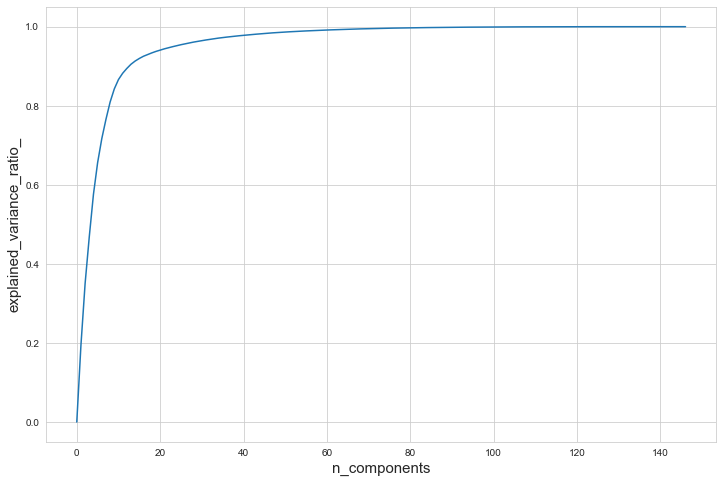

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel('n_components', fontsize=15)
plt.ylabel('explained_variance_ratio_', fontsize=15)
plt.show()

In [38]:
X_train_pca = X_train_pca[:, :8]
X_test_pca = X_test_pca[:, :8]

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [41]:
%%time

cv = KFold(n_splits=5, shuffle=True, random_state=0)
rf_score = np.sqrt(- cross_val_score(
    RandomForestRegressor(n_estimators=500, max_depth=6),
    X=X_train,
    y=y_train,
    cv=cv,
    scoring='neg_mean_squared_error'
))

print(rf_score.mean())

0.1556373795388304
Wall time: 27.3 s


In [43]:
%%time

cv = KFold(n_splits=5, shuffle=True, random_state=0)
rf_pca_score = np.sqrt(- cross_val_score(
    RandomForestRegressor(n_estimators=500, max_depth=6),
    X=X_train_pca,
    y=y_train,
    cv=cv,
    scoring='neg_mean_squared_error'
))

print(rf_pca_score.mean())

0.2564771143840094
Wall time: 8.72 s
